In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [25]:
# Activation function: Sigmoid with clipping to prevent overflow
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class with 2 hidden layers
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden1 = 2 * np.random.rand(input_size, hidden1_size) - 1
        self.bias_hidden1 = 2 * np.random.rand(hidden1_size) - 1
        self.weights_hidden1_hidden2 = 2 * np.random.rand(hidden1_size, hidden2_size) - 1
        self.bias_hidden2 = 2 * np.random.rand(hidden2_size) - 1
        self.weights_hidden2_output = 2 * np.random.rand(hidden2_size, output_size) - 1
        self.bias_output = 2 * np.random.rand(output_size) - 1

    def forward(self, inputs):
        # Forward propagation
        self.hidden1_input = np.dot(inputs, self.weights_input_hidden1) + self.bias_hidden1
        self.hidden1_output = sigmoid(self.hidden1_input)
        self.hidden2_input = np.dot(self.hidden1_output, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.hidden2_output = sigmoid(self.hidden2_input)
        self.output_layer_input = np.dot(self.hidden2_output, self.weights_hidden2_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, inputs, expected_output, learning_rate):
        # Calculate error
        output_error = expected_output - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden2_error = output_delta.dot(self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * sigmoid_derivative(self.hidden2_output)

        hidden1_error = hidden2_delta.dot(self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * sigmoid_derivative(self.hidden1_output)

        # Update weights and biases
        self.weights_hidden2_output += self.hidden2_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_hidden1_hidden2 += self.hidden1_output.T.dot(hidden2_delta) * learning_rate
        self.bias_hidden2 += np.sum(hidden2_delta, axis=0) * learning_rate
        self.weights_input_hidden1 += inputs.T.dot(hidden1_delta) * learning_rate
        self.bias_hidden1 += np.sum(hidden1_delta, axis=0) * learning_rate

        # Return the error for plotting
        return np.sum(output_error**2) / len(inputs)

    def train(self, inputs, expected_output, iterations, learning_rate):
        errors = []
        for i in range(iterations):
            self.forward(inputs)
            error = self.backward(inputs, expected_output, learning_rate)
            errors.append(error)
            # if iterations % 500 == 0:
                # learning_rate *= 0.9
        print(error)
        return errors
    
    def export_weights_biases(self, file_path):
        with open(file_path, 'w') as f:
            f.write(f"W1:\n{self.weights_input_hidden1}\n\n")
            f.write(f"b1:\n{self.bias_hidden1}\n\n")
            f.write(f"W2:\n{self.weights_hidden1_hidden2}\n\n")
            f.write(f"b2:\n{self.bias_hidden2}\n\n")
            f.write(f"W3:\n{self.weights_hidden2_output}\n\n")
            f.write(f"b3:\n{self.bias_output}\n\n")

In [17]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [line.strip().split() for line in file.readlines()]
    return np.array(data, dtype=float)

In [18]:
inputs = read_data('input.txt')
expected_output = read_data('output.txt')
expected_output = expected_output.reshape(-1, 10)  # Adjust this based on your output size
test= read_data('test.txt')
test_c= read_data('test_check.txt')

In [19]:
input_size = 784
hidden1_size = 16
hidden2_size = 16
output_size = 10



print("Learnable parameters:",input_size*hidden1_size+hidden1_size*hidden2_size+hidden2_size*output_size )
print("Training images:",len(inputs))

Learnable parameters: 12960
Training images: 42000


0.9061875626504511
Epochs: 20


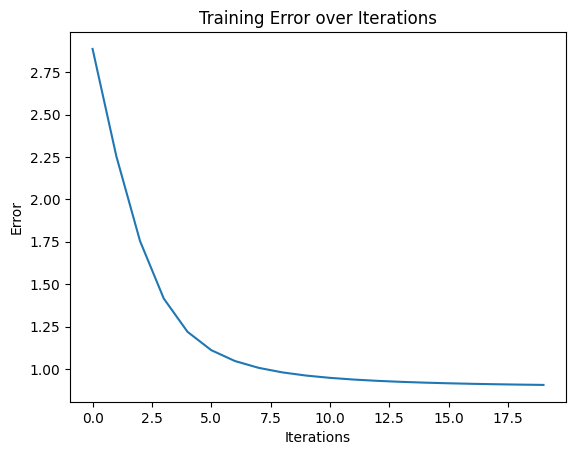

In [29]:
# Example usage
if __name__ == "__main__":
    epochs = 0
    iterations = 20
    epochs += iterations
    learning_rate=1/(len(inputs))

    num_runs = 1
    all_errors = []

    np.set_printoptions(threshold=sys.maxsize)
    np.set_printoptions(precision=4)

    for i in range(num_runs):
        nn = NeuralNetwork(input_size, hidden1_size, hidden2_size, output_size)
        errors = nn.train(inputs, expected_output, iterations, learning_rate)
        all_errors.append(errors)

        nn.export_weights_biases(f"weights_biases_run_{i+1}.txt")

    print (f"Epochs: {epochs}")
    # Plot the error values on a logarithmic scale on the x-axis
    for i, errors in enumerate(all_errors):
        plt.plot(errors, label=f'Run {i+1}')

    # plt.xscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Training Error over Iterations')
    plt.show()

0.34438245656173333
Epochs: 2000


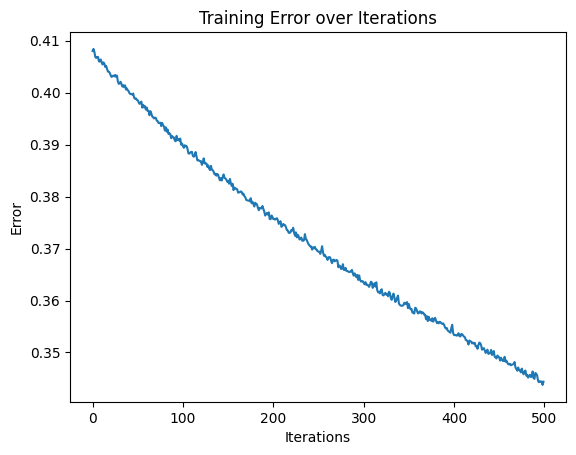

Train Accuracy: 77.98%


In [33]:
conti = 500
epochs += conti
# learning_rate=0.35/(len(inputs))

errors = nn.train(inputs, expected_output, conti, learning_rate)
all_errors.append(errors)

        # nn.export_weights_biases(f"weights_biases_run_{i+1}.txt")

    # Plot the error values on a logarithmic scale on the x-axis
    # for i, errors in enumerate(all_errors):
plt.plot(errors, label=f'Run {i+1}')
print (f"Epochs: {epochs}")

    # plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Training Error over Iterations')
plt.show()

res=nn.forward(test)
accuracy=0

for i in range(len(res)):
    max=0
    for j in range(10):
        if test_c[i][j]==1:
            max=j
    accuracy+=np.argmax(res[i])==max
print(f"Train Accuracy: {accuracy/len(res)*100:.2f}%")

In [22]:
nn.export_weights_biases(f"weights_biases_run_{i+1}.txt")

In [23]:
test= read_data('test.txt')

In [24]:
# print("Predicted Output:")
res=nn.forward(test)
accuracy=0
# for i in range(len(res)):
#     sum=res[i][0]+res[i][1]+res[i][2]+res[i][3]+res[i][4]+res[i][5]+res[i][6]+res[i][7]+res[i][8]+res[i][9]
#     print(f"0: {(res[i][0]/sum)*100:.2f}%, 1: {(res[i][1]/sum)*100:.2f}%, 2: {(res[i][2]/sum)*100:.2f}%, 3: {(res[i][3]/sum)*100:.2f}%, 4: {(res[i][4]/sum)*100:.2f}%, 5: {(res[i][5]/sum)*100:.2f}%, 6: {(res[i][6]/sum)*100:.2f}%, 7: {(res[i][7]/sum)*100:.2f}%, 8: {(res[i][8]/sum)*100:.2f}%, 9: {(res[i][9]/sum)*100:.2f}%")
# num=0

for i in range(len(res)):
    # print(f"Predicted: {np.argmax(res[i])} Actual: 9")
    # if i%100==0:
    #     num+=1
    max=0
    for j in range(10):
        if test_c[i][j]==1:
            max=j
    accuracy+=np.argmax(res[i])==max
print(f"Train Accuracy: {accuracy/len(res)*100:.2f}%")

Train Accuracy: 10.36%
